In [1]:
import grammar
import my_parser

with open("../data/telescope.srgs", "r") as f:
    lines = f.readlines()
    #print("".join(lines))
    gr = grammar.Grammar(lines)

##### H 3.1

S -> NP VP<br>
NP -> I | Det N<br>
Det -> the | a | my | her<br>
N -> duck | telescope | saw<br>
VP -> VP PP | V NP<br>
V -> saw | duck<br>
NP -> NP PP<br>
PP -> P NP<br>
P -> with<br>

In [2]:
gr.is_CNF()

True

##### H 3.2

In [3]:
sentence = "I saw the duck with a telescope"
tokens = sentence.split(" ")

# check if sentense is in language
b, t = my_parser.is_in_language(tokens, gr)
print("Is in language: ", b)

# print table
t

Is in language:  True


,0,1,2,3,4,5,6,7
0,{},{$NP},{},{},{$S},{},{},{$S}
1,{},{},"{$V, $N}",{},{$VP},{},{},{$VP}
2,{},{},{},{$Det},{$NP},{},{},{$NP}
3,{},{},{},{},"{$V, $N}",{},{},{}
4,{},{},{},{},{},{$P},{},{$PP}
5,{},{},{},{},{},{},{$Det},{$NP}
6,{},{},{},{},{},{},{},{$N}
7,{},{},{},{},{},{},{},{}


In [4]:
# print parse path
my_parser.parse(tokens, gr)

Possible parses:


[[$S [[$NP [I]] [$VP [[$V [saw]] [$NP [[$NP [[$Det [the]] [$N [duck]]]] [$PP [[$P [with]] [$NP [[$Det [a]] [$N [telescope]]]]]]]]]]]],
 [$S [[$NP [I]] [$VP [[$VP [[$V [saw]] [$NP [[$Det [the]] [$N [duck]]]]]] [$PP [[$P [with]] [$NP [[$Det [a]] [$N [telescope]]]]]]]]]]]

##### H 3.3

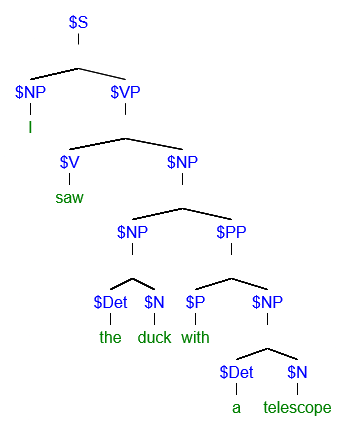
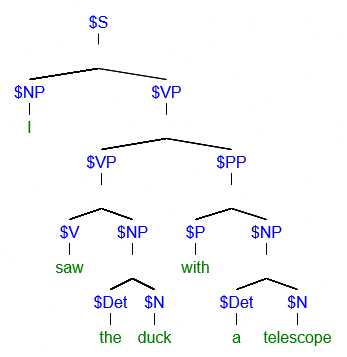

##### Exemmple for sentence that would not be acceoted by language

In [5]:
sentence = "I saw the duck ducking duck duck with a telescope"
tokens = sentence.split(" ")

# check if sentense is in language
b, t = my_parser.is_in_language(tokens, gr)
print("Is in language: ", b)

# print table
t

Is in language:  False


,0,1,2,3,4,5,6,7,8,9,10
0,{},{$NP},{},{},{$S},{},{},{},{},{},{}
1,{},{},"{$N, $V}",{},{$VP},{},{},{},{},{},{}
2,{},{},{},{$Det},{$NP},{},{},{},{},{},{}
3,{},{},{},{},"{$N, $V}",{},{},{},{},{},{}
4,{},{},{},{},{},{},{},{},{},{},{}
5,{},{},{},{},{},{},"{$N, $V}",{},{},{},{}
6,{},{},{},{},{},{},{},"{$N, $V}",{},{},{}
7,{},{},{},{},{},{},{},{},{$P},{},{$PP}
8,{},{},{},{},{},{},{},{},{},{$Det},{$NP}
9,{},{},{},{},{},{},{},{},{},{},{$N}


In [6]:
# print parse path
my_parser.parse(tokens, gr)

No valid parse found for the sentence.


[]